Playing around with data and code so will be unstructured. See [audio-main notebook]() for structure

Load and run main notebook to get `visual_features_paths` variable

In [3]:
main_notebook = 'main.ipynb'

In [4]:
# %load main_notebook
main.ipynb

In [5]:
%run 'main.ipynb'

In [6]:
ys = features_with_y.loc[0:, 'emotion_labels']
# ys

# Reduce dimensions

In [10]:
def load_text_features(text_features_paths, ys):
    """Reduce from 2D to 1D by removing the time dimension
    
    visual_features_paths -- list
    
    Return 
    reduced shapes of each input -- list
    """
    
    loaded_text_features = []
    true_labels = []
    
    for row in range(len(text_features_paths)):
        # print("Current path with files is: ", text_features_paths)
        path_exists = os.path.exists(text_features_paths[row])
        # print(path_exists)
        if path_exists == True:
            # print("Current path with files is: ", text_features_paths[row])
            load_text_features_file = np.load(text_features_paths[row])
            # print("  Original Shape: ", np.shape(load_text_features_file))
            # resampled_text = np.mean(load_text_features_file, axis=0)
            # print("  Reduced shape: ", np.shape(resampled_text))
            loaded_text_features.append(load_text_features_file)
            # print("  reduced_text_features: ", np.shape(reduced_text_features))
            true_labels.append(ys[row])
            # print()
        else:
            pass
            # print("CANNOT find current path: ", audio_features_path)
    return loaded_text_features, true_labels

In [12]:
loaded_text_features, true_labels = load_text_features(text_features_paths, ys)
np.shape(loaded_text_features), np.shape(true_labels)

((1329, 768), (1329,))

# Split Datasets into Train, Validate, Test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(loaded_text_features, true_labels, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_test)
total_Y = len(y_train) + len(y_test)
len(X_train), len(X_test), len(y_train), len(y_test), total_X, total_Y

(398, 931, 398, 931, 1329, 1329)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_val)
total_Y = len(y_train) + len(y_val)
len(X_train), len(X_val), len(y_train), len(y_val), total_X, total_Y, np.shape(X_train), np.shape(y_train)

(119, 279, 119, 279, 398, 398, (119, 768), (119,))

# Before Hyper-Parameter Tuning

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


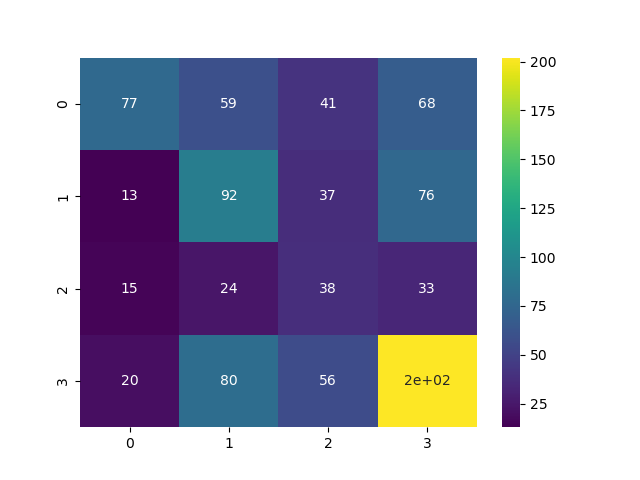

In [16]:
before_hp_model = svm.LinearSVC()
before_hp_model.fit(X_train, y_train)
y_pred = before_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.31      0.42       245
           1       0.36      0.42      0.39       218
           2       0.22      0.35      0.27       110
           3       0.53      0.56      0.55       358

    accuracy                           0.44       931
   macro avg       0.43      0.41      0.41       931
weighted avg       0.48      0.44      0.44       931



# After Hyper-Parameter Tuning

In [18]:
# estimator is LinearSVC()
linear_classifier = svm.LinearSVC()
parameters = param_grid = {
    'C': [0.01, 0.1, 10, 100], 
    # 'class_weight': [1],
    # 'dual':,
    'fit_intercept': [True, False],
    # 'intercept_scaling':,
    'loss': ['hinge', 'squared_hinge'],
    # 'max_iter':,
     # 'multi_class': [1],
    # 'penalty': ['l1', 'l2'],
    'penalty': ['l2'],
    # 'random_state':,
    # 'tol': , 
    # 'verbose':    
}

classification = GridSearchCV(linear_classifier, param_grid=parameters, cv=10, return_train_score=True)
classification

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [19]:
classification.fit(X_train, y_train)

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']},
             return_train_score=True)

In [20]:
print(classification.best_estimator_)

LinearSVC(C=0.1)


In [21]:
print("Accuracy:"+ str(classification.score(X_train, y_train)))

Accuracy:0.9915966386554622


In [22]:
# note difference in Accuracy with 'fit_intercept': [True'] vs 'fit_intercept': [False],
print(classification.best_params_)
print("Accuracy:"+ str(classification.best_score_))

{'C': 0.1, 'fit_intercept': True, 'loss': 'squared_hinge', 'penalty': 'l2'}
Accuracy:0.4537878787878788


In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.439312567132116

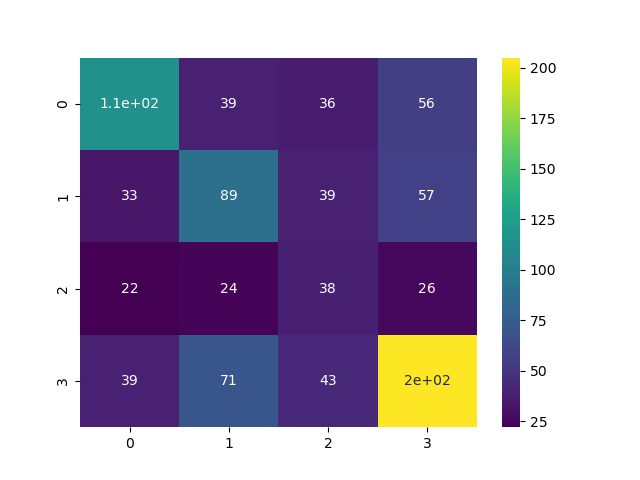

In [24]:
after_hp_model = svm.LinearSVC(C=0.01, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.47      0.50       245
           1       0.40      0.41      0.40       218
           2       0.24      0.35      0.29       110
           3       0.60      0.57      0.58       358

    accuracy                           0.48       931
   macro avg       0.45      0.45      0.44       931
weighted avg       0.50      0.48      0.49       931



/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


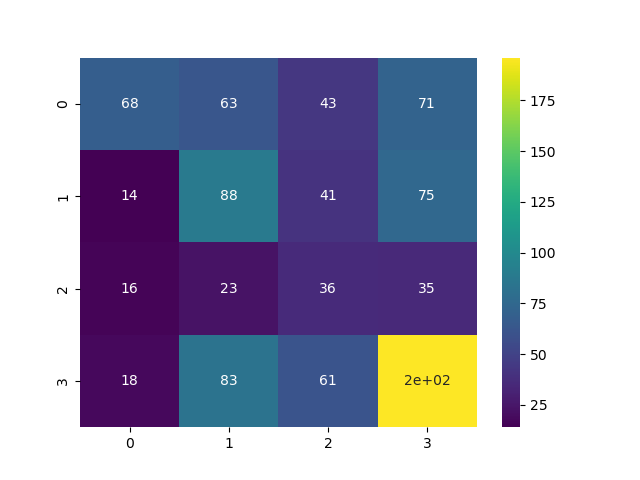

In [26]:
after_hp_model = svm.LinearSVC(C=1, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


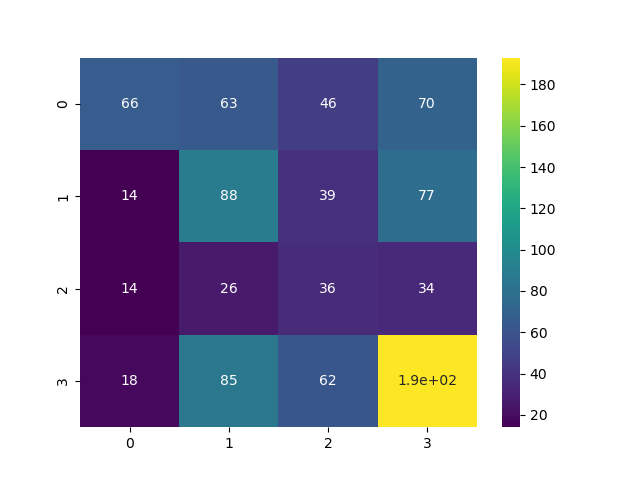

In [27]:
after_hp_model = svm.LinearSVC(C=10, fit_intercept=True, loss='hinge', penalty='l2').fit(X_train, y_train)
y_pred = after_hp_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()